In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("owid-covid-data.csv")

# Preview the data
print(df.head())


  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [2]:
# Check data structure
print(df.info())

# Drop rows where location is missing or where total_cases is NaN
df = df.dropna(subset=["location", "total_cases"])

# Filter out continents and keep only countries (optional)
df = df[~df['iso_code'].str.startswith('OWID')]

# Check for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [3]:
# Latest data (most recent date per country)
latest = df.sort_values('date').groupby('location').tail(1)

# Top 10 countries by total cases
top_cases = latest[['location', 'total_cases']].sort_values(by='total_cases', ascending=False).head(10)
print("Top 10 countries by total COVID-19 cases:")
print(top_cases)

# Summary statistics
print("\nSummary statistics for total_cases:")
print(latest['total_cases'].describe())


Top 10 countries by total COVID-19 cases:
              location  total_cases
405124   United States  103436829.0
75343            China   99373219.0
175222           India   45041748.0
132040          France   38997490.0
142084         Germany   38437756.0
51907           Brazil   37511921.0
360911     South Korea   34571873.0
190299           Japan   33803572.0
186948           Italy   26781078.0
403450  United Kingdom   24974629.0

Summary statistics for total_cases:
count    2.330000e+02
mean     3.328723e+06
std      1.144504e+07
min      0.000000e+00
25%      2.529200e+04
50%      1.866940e+05
75%      1.279115e+06
max      1.034368e+08
Name: total_cases, dtype: float64


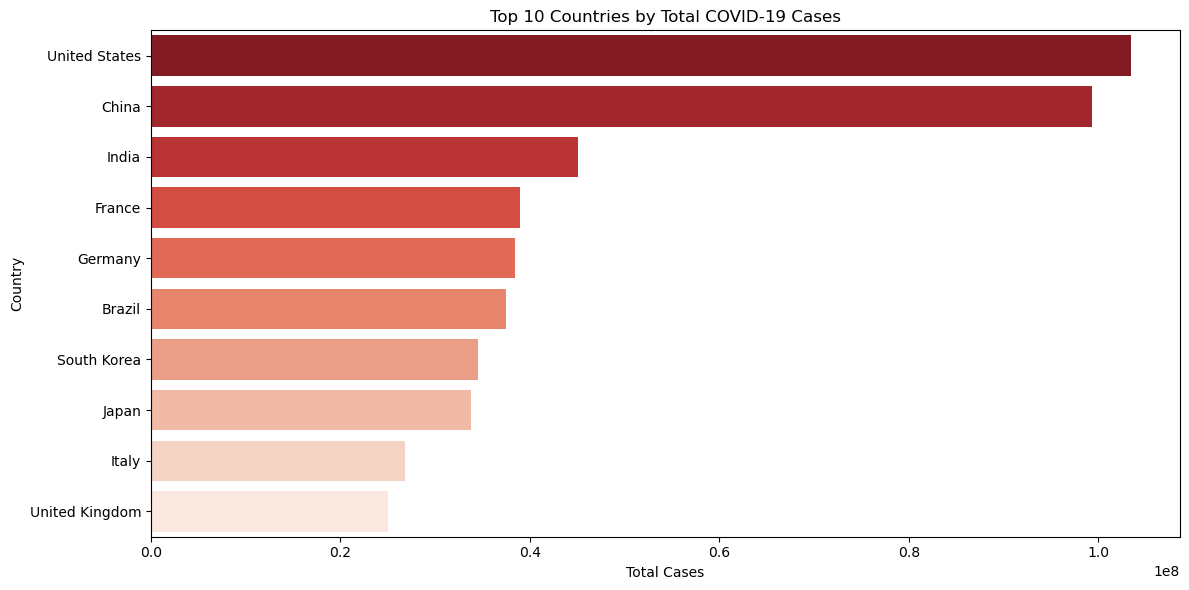

In [4]:
plt.figure(figsize=(12,6))
sns.barplot(x='total_cases', y='location', data=top_cases, palette='Reds_r')
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.tight_layout()
plt.show()



In [ ]:
global_trend = df.groupby('date')['new_cases'].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(global_trend['date'], global_trend['new_cases'], color='blue')
plt.title('Global Daily New COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.grid(True)
plt.tight_layout()
plt.show()


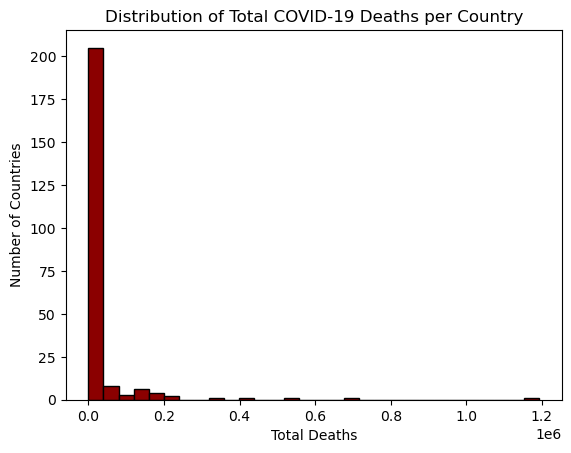

In [8]:
plt.hist(latest['total_deaths'].dropna(), bins=30, color='darkred', edgecolor='black')
plt.title('Distribution of Total COVID-19 Deaths per Country')
plt.xlabel('Total Deaths')
plt.ylabel('Number of Countries')
plt.show()
